# Beijing House Price Forecasting 

- **Student Name:** Hasib Md Ashikur Rahman 哈思
- **Student ID:** 228801141
- **Department:** Software Engineering

In this notebook, I will work with Beijing house price data. My workflow:

1. Load the dataset.
2. Validate the schema and columns.
3. Perform EDA (shape, dtypes, missing values, duplicates, statistics).
4. Preprocess (handle missing values, remove duplicates, filter invalid records, compute unit price, remove outliers).
5. Visualize (scatter plots, distributions, regional analysis).
6. Feature engineering (encode categorical variables, split data into train/test).
7. Build univariate regression (using building area only).
8. Build multivariate regression (using multiple features).
9. Evaluate models and summarize findings.

I have used a dataset from kaggle as the provided dataset includes Chinese language which is difficult to interperate for me. Each step will be documented.

## Step 1: Data Loading and Initial Exploration

In [3]:
# Step 1: Download and load Beijing house price data from Kaggle
import pandas as pd
import os
import kagglehub

# Create Data directory if it doesn't exist
os.makedirs('Data', exist_ok=True)

# Download latest version of Lianjia dataset from Kaggle
path = kagglehub.dataset_download("ruiqurm/lianjia")
print("Path to dataset files:", path)

# Find and load the Beijing house price CSV file
import glob
csv_files = glob.glob(os.path.join(path, '*.csv'))
print(f"\nFound {len(csv_files)} CSV files in the dataset")


Path to dataset files: C:\Users\arhas\.cache\kagglehub\datasets\ruiqurm\lianjia\versions\2

Found 1 CSV files in the dataset


In [ ]:
# Load the first CSV file with proper encoding for Chinese characters
if csv_files:
    # Try different encodings common for Chinese datasets
    for encoding in ['gbk', 'gb2312', 'gb18030', 'utf-8']:
        try:
            df = pd.read_csv(csv_files[0], encoding=encoding)
            print(f'Data loaded successfully with {encoding} encoding')
            print(f'File: {csv_files[0]}')
            print('='*80)
            break
        except UnicodeDecodeError:
            continue


✓ Data loaded successfully with gbk encoding
✓ File: C:\Users\arhas\.cache\kagglehub\datasets\ruiqurm\lianjia\versions\2\new.csv


C:\Users\arhas\AppData\Local\Temp\ipykernel_20744\2249387408.py:6: DtypeWarning: Columns (1,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_files[0], encoding=encoding)


In [14]:

# Display dataset information
print(f'Dataset Overview:')
print(f'   Rows: {df.shape[0]:,}')
print(f'   Columns: {df.shape[1]}')

print(f'Column Names:')
for i, col in enumerate(df.columns, 1):
    print(f'   {i}. {col}')
    


Dataset Overview:
   Rows: 318,851
   Columns: 26
Column Names:
   1. url
   2. id
   3. Lng
   4. Lat
   5. Cid
   6. tradeTime
   7. DOM
   8. followers
   9. totalPrice
   10. price
   11. square
   12. livingRoom
   13. drawingRoom
   14. kitchen
   15. bathRoom
   16. floor
   17. buildingType
   18. constructionTime
   19. renovationCondition
   20. buildingStructure
   21. ladderRatio
   22. elevator
   23. fiveYearsProperty
   24. subway
   25. district
   26. communityAverage


In [15]:
print(f'Data Types:')
print(df.dtypes)

Data Types:
url                     object
id                      object
Lng                    float64
Lat                    float64
Cid                      int64
tradeTime               object
DOM                    float64
followers                int64
totalPrice             float64
price                    int64
square                 float64
livingRoom              object
drawingRoom             object
kitchen                  int64
bathRoom                object
floor                   object
buildingType           float64
constructionTime        object
renovationCondition      int64
buildingStructure        int64
ladderRatio            float64
elevator               float64
fiveYearsProperty      float64
subway                 float64
district                 int64
communityAverage       float64
dtype: object


In [16]:

print(f'First 5 Rows:')
display(df.head())

First 5 Rows:


,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


In [17]:
print(f'Basic Statistics:')
display(df.describe())

Basic Statistics:


,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,318851.000000,318851.000000,3.188510e+05,160874.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,316830.000000,318851.000000,318851.000000,3.188510e+05,318819.000000,318819.000000,318819.000000,318851.000000,318388.000000
mean,116.418459,39.949591,1.129113e+12,28.822339,16.731508,349.030201,43530.436379,83.240597,0.994599,3.009790,2.606330,4.451026,6.316486e+01,0.577055,0.645601,0.601112,6.763564,63682.446305
std,0.112054,0.091983,2.363447e+12,50.237343,34.209185,230.780778,21709.024204,37.234661,0.109609,1.269857,1.311739,1.901753,2.506851e+04,0.494028,0.478331,0.489670,2.812616,22329.215447
min,116.072514,39.627030,1.111027e+12,1.000000,0.000000,0.100000,1.000000,6.900000,0.000000,0.048000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,116.344985,39.893200,1.111027e+12,1.000000,0.000000,205.000000,28050.000000,57.900000,1.000000,1.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46339.000000
50%,116.416780,39.934527,1.111027e+12,6.000000,5.000000,294.000000,38737.000000,74.260000,1.000000,4.000000,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59015.000000
75%,116.477581,40.003018,1.111027e+12,37.000000,18.000000,425.500000,53819.500000,98.710000,1.000000,4.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75950.000000
max,116.732378,40.252758,1.114620e+15,1677.000000,1143.000000,18130.000000,156250.000000,1745.500000,4.000000,4.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000


## Step 2: Exploratory Data Analysis (EDA)

Now I will examine the dataset more carefully to understand its structure, identify missing values, check for duplicates, and look for any data quality issues that need to be addressed.

In [18]:
# Check for missing values
print("Missing Values Analysis:")
print("="*80)
missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing Count': missing.values,
    'Percentage': missing_pct.values
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print(f"\nFound {len(missing_df)} columns with missing values:\n")
    display(missing_df)
else:
    print("\nNo missing values found!")

Missing Values Analysis:

Found 6 columns with missing values:



,Column,Missing Count,Percentage
6,DOM,157977,49.545713
16,buildingType,2021,0.633838
25,communityAverage,463,0.145209
21,elevator,32,0.010036
22,fiveYearsProperty,32,0.010036
23,subway,32,0.010036


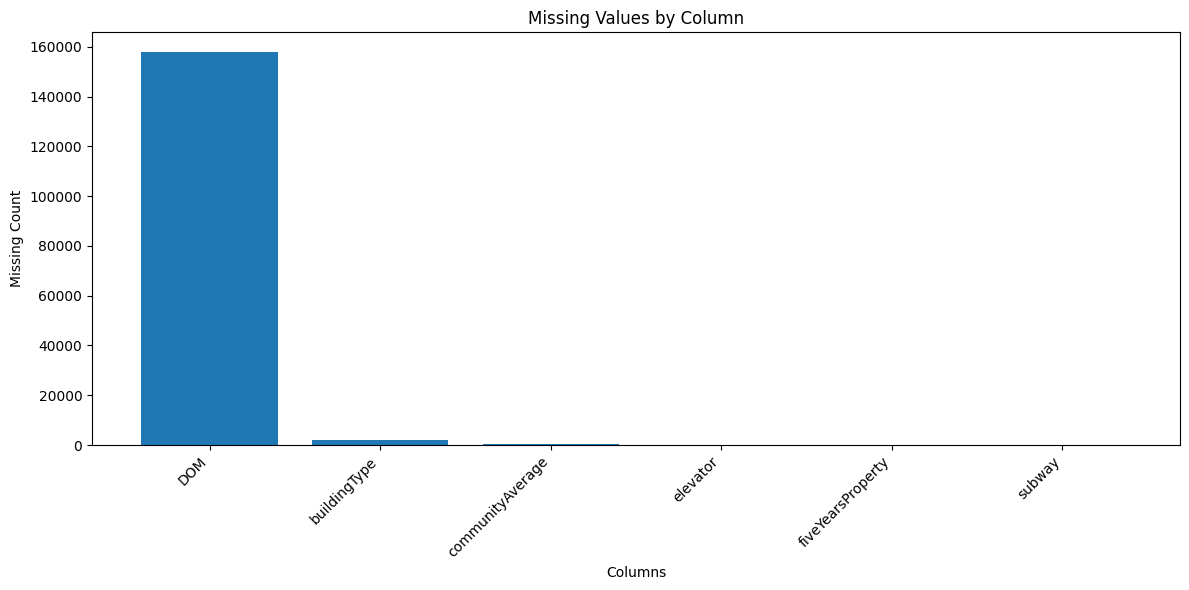

In [25]:
# Visualize missing values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]

if len(missing_data) > 0:
    plt.bar(range(len(missing_data)), missing_data.values)
    plt.xticks(range(len(missing_data)), missing_data.index, rotation=45, ha='right')
    plt.xlabel('Columns')
    plt.ylabel('Missing Count')
    plt.title('Missing Values by Column')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values to visualize")

In [19]:
# Check for duplicate rows
print("\nDuplicate Rows Analysis:")
print("="*80)
duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {duplicates:,}")
print(f"Percentage: {(duplicates/len(df)*100):.2f}%")

if duplicates > 0:
    print(f"\nFound {duplicates:,} duplicate rows that should be removed during preprocessing")
else:
    print("\nNo duplicate rows found!")


Duplicate Rows Analysis:
Total duplicate rows: 0
Percentage: 0.00%

No duplicate rows found!
Total duplicate rows: 0
Percentage: 0.00%

No duplicate rows found!


In [22]:
# Analyze numeric columns for outliers and invalid values
print("\nNumeric Columns Analysis:")
print("="*80)

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(f"Found {len(numeric_cols)} numeric columns\n")

for col in numeric_cols:
    print(f"\n{col}:")
    print(f"  Min: {df[col].min()}")
    print(f"  Max: {df[col].max()}")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    
    # Check for zeros or negative values that might be invalid
    zeros = (df[col] == 0).sum()
    negatives = (df[col] < 0).sum()
    
    if zeros > 0:
        print(f"  Zero values: {zeros:,} ({zeros/len(df)*100:.2f}%)")
    if negatives > 0:
        print(f"  Negative values: {negatives:,} ({negatives/len(df)*100:.2f}%)")


Numeric Columns Analysis:
Found 18 numeric columns


Lng:
  Min: 116.072514
  Max: 116.732378
  Mean: 116.42
  Median: 116.42

Lat:
  Min: 39.62703
  Max: 40.252758
  Mean: 39.95
  Median: 39.93

Cid:
  Min: 1111027373683
  Max: 1114619720585020
  Mean: 1129113334722.66
  Median: 1111027378407.00

DOM:
  Min: 1.0
  Max: 1677.0
  Mean: 28.82
  Median: 6.00

followers:
  Min: 0
  Max: 1143
  Mean: 16.73
  Median: 5.00
  Zero values: 83,487 (26.18%)

totalPrice:
  Min: 0.1
  Max: 18130.0
  Mean: 349.03
  Median: 294.00

price:
  Min: 1
  Max: 156250
  Mean: 43530.44
  Median: 38737.00

square:
  Min: 6.9
  Max: 1745.5
  Mean: 83.24
  Median: 74.26

kitchen:
  Min: 0
  Max: 4
  Mean: 0.99
  Median: 1.00
  Zero values: 2,680 (0.84%)

buildingType:
  Min: 0.048
  Max: 4.0
  Mean: 3.01
  Median: 4.00

renovationCondition:
  Min: 0
  Max: 4
  Mean: 2.61
  Median: 3.00
  Zero values: 26 (0.01%)

buildingStructure:
  Min: 0
  Max: 6
  Mean: 4.45
  Median: 6.00
  Zero values: 28 (0.01%)

ladderR

In [23]:
# Analyze categorical columns
print("\nCategorical Columns Analysis:")
print("="*80)

categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Found {len(categorical_cols)} categorical columns\n")

for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"\n{col}:")
    print(f"  Unique values: {unique_count}")
    print(f"  Top 5 values:")
    top_values = df[col].value_counts().head(5)
    for value, count in top_values.items():
        print(f"    - {value}: {count:,} ({count/len(df)*100:.2f}%)")


Categorical Columns Analysis:
Found 8 categorical columns


url:
  Unique values: 318851
  Top 5 values:
    - https://bj.lianjia.com/chengjiao/101084782030.html: 1 (0.00%)
    - https://bj.lianjia.com/chengjiao/101086012217.html: 1 (0.00%)
    - https://bj.lianjia.com/chengjiao/101086041636.html: 1 (0.00%)
    - https://bj.lianjia.com/chengjiao/101086406841.html: 1 (0.00%)
    - https://bj.lianjia.com/chengjiao/101086920653.html: 1 (0.00%)

id:
  Unique values: 318851
  Top 5 values:
    - 101084782030: 1 (0.00%)
    - 101086012217: 1 (0.00%)
    - 101086041636: 1 (0.00%)
    - 101086406841: 1 (0.00%)
    - 101086920653: 1 (0.00%)

tradeTime:
  Unique values: 2560
  Top 5 values:
    - 2016-02-28: 1,096 (0.34%)
    - 2016-03-06: 948 (0.30%)
    - 2016-07-31: 940 (0.29%)
    - 2016-08-31: 910 (0.29%)
    - 2016-03-05: 824 (0.26%)

livingRoom:
  Unique values: 21
  Top 5 values:
    - 2: 83,333 (26.14%)
    - 2: 77,256 (24.23%)
    - 1: 42,138 (13.22%)
    - 1: 40,248 (12.62%)
    - 3:

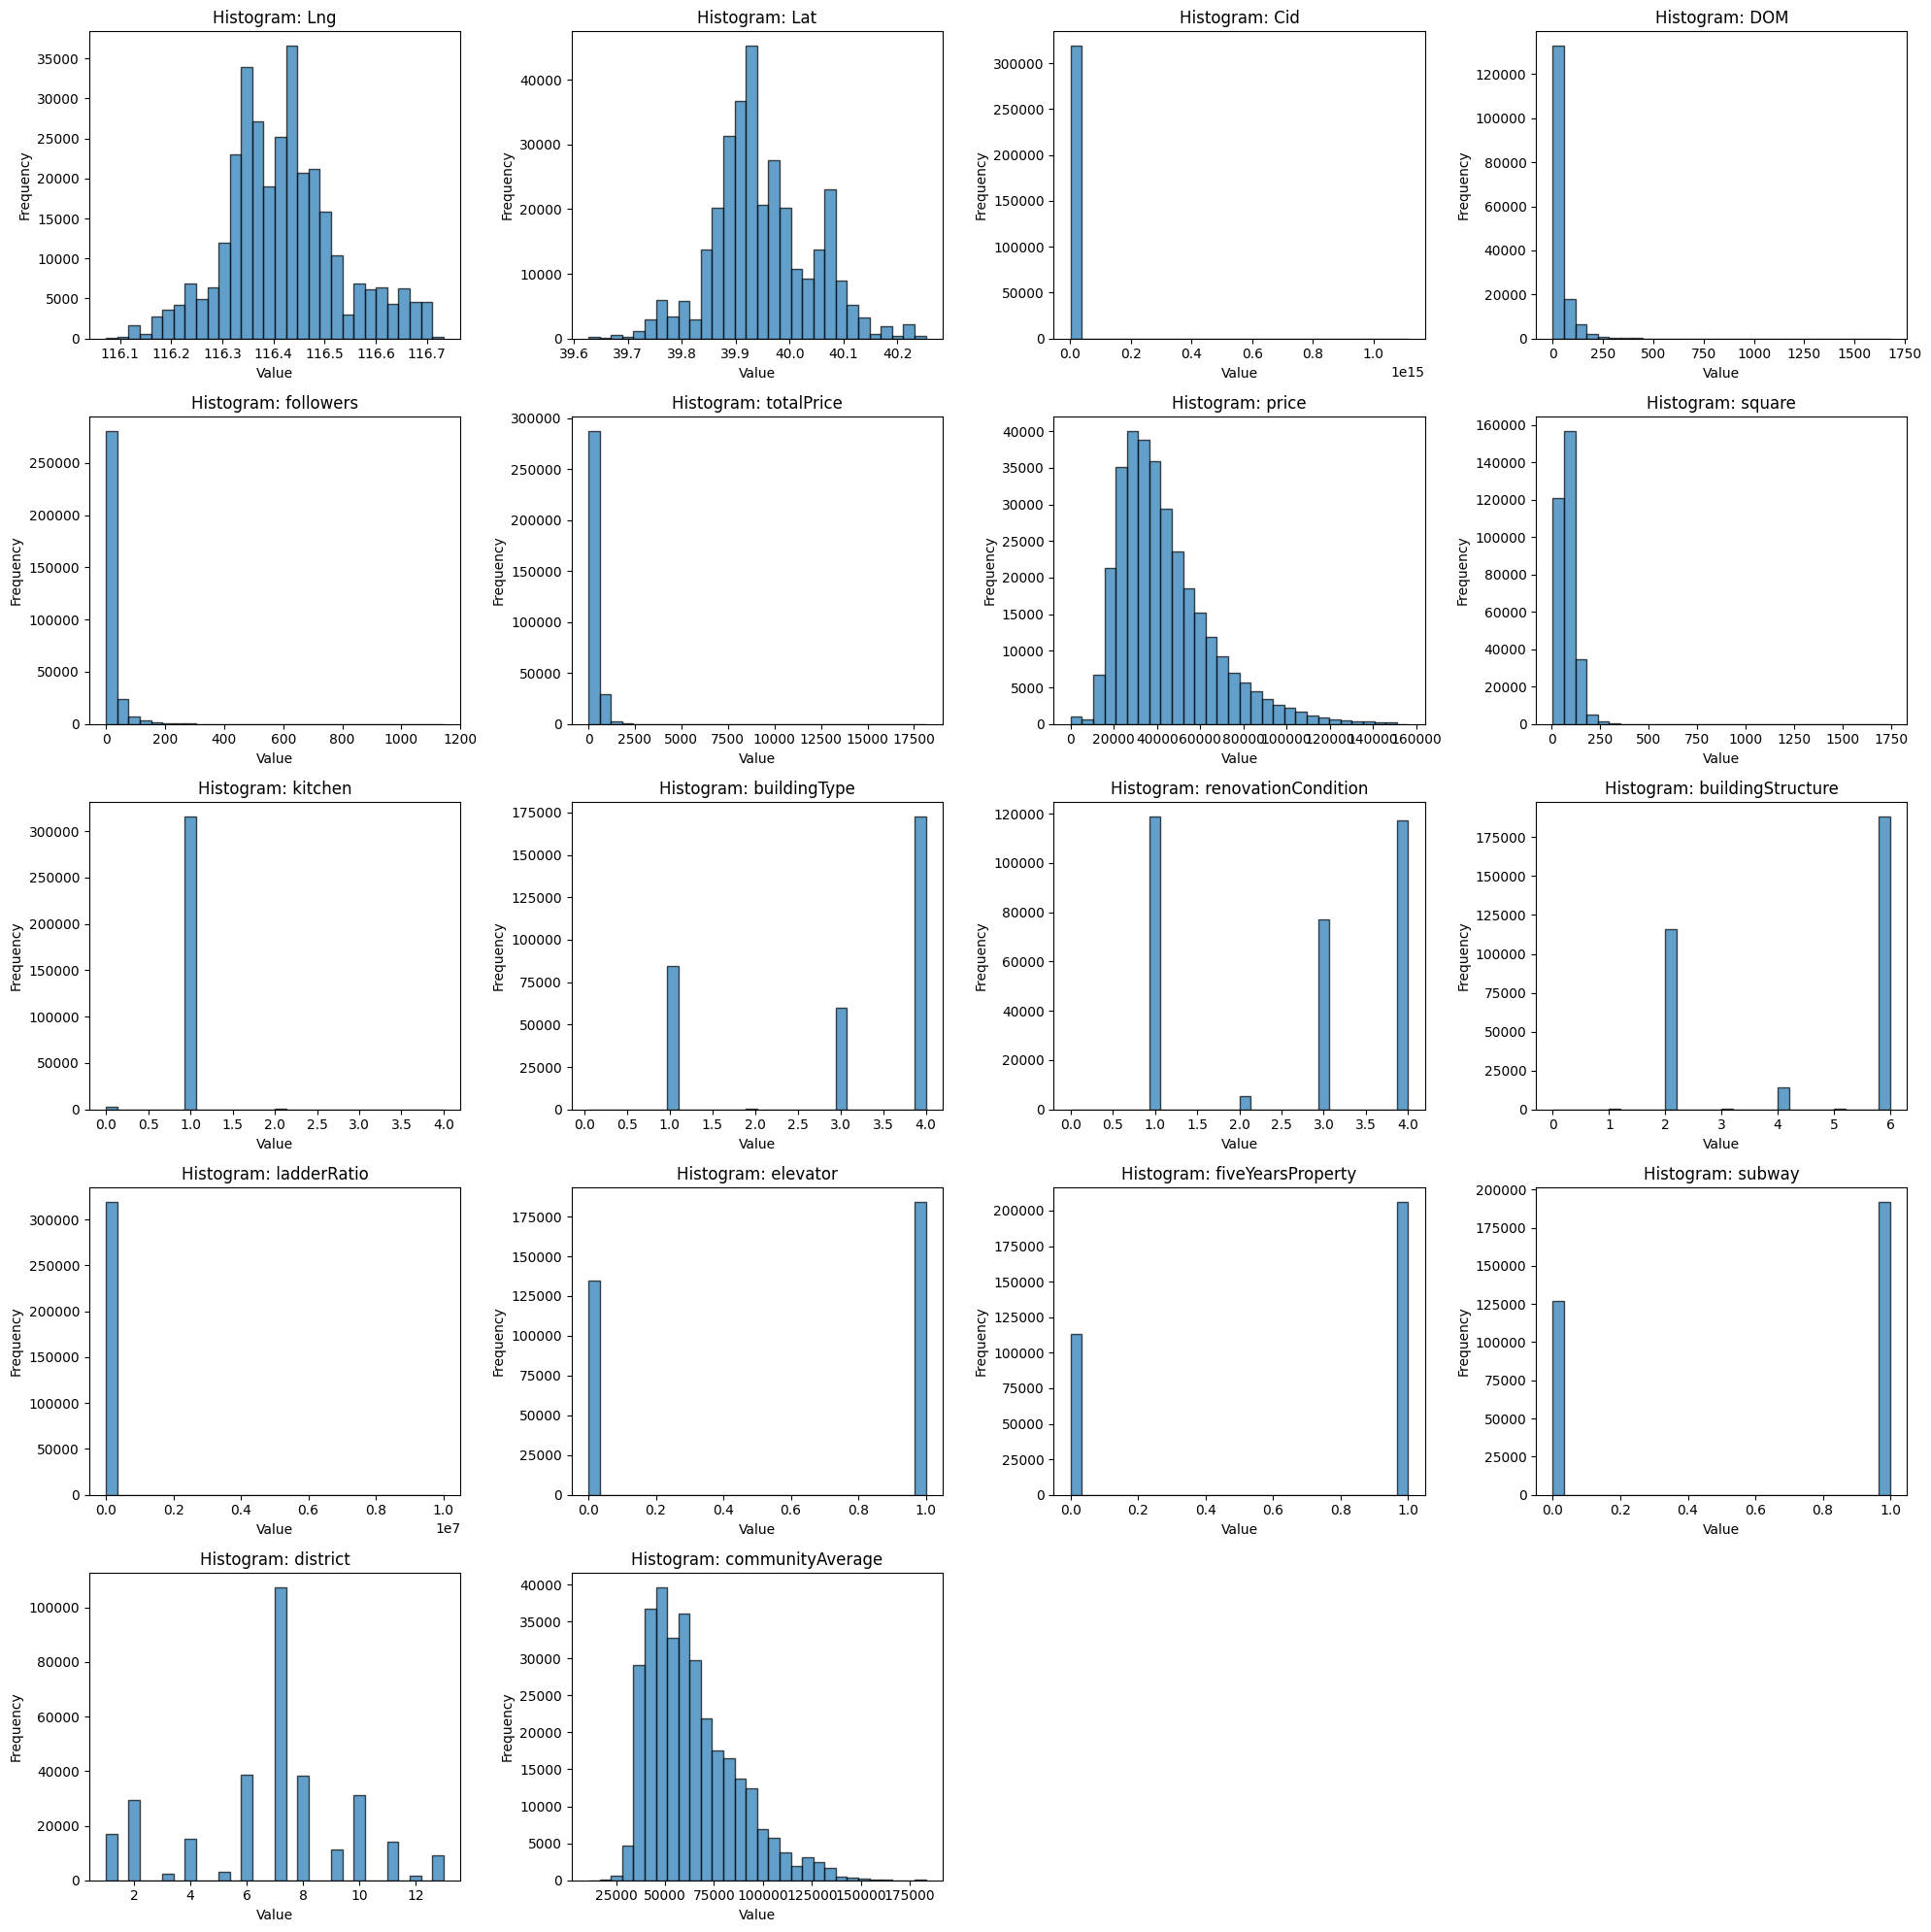

In [31]:
# Distribution of numeric features - Histograms
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calculate number of rows needed (4 histograms per row)
num_cols_to_plot = len(numeric_cols)
plots_per_row = 4
num_rows = (num_cols_to_plot + plots_per_row - 1) // plots_per_row

fig, axes = plt.subplots(num_rows, 4, figsize=(20, num_rows * 4))

# Ensure axes is always 2D
if num_rows == 1:
    axes = axes.reshape(1, -1)

col_idx = 0
for row in range(num_rows):
    for col in range(4):
        if col_idx < num_cols_to_plot:
            col_name = numeric_cols[col_idx]
            data = df[col_name].dropna()
            
            # Histogram
            axes[row, col].hist(data, bins=30, edgecolor='black', alpha=0.7)
            axes[row, col].set_title(f'Histogram: {col_name}')
            axes[row, col].set_xlabel('Value')
            axes[row, col].set_ylabel('Frequency')
            
            col_idx += 1
        else:
            # Hide unused subplots
            axes[row, col].axis('off')

plt.tight_layout()
plt.show()

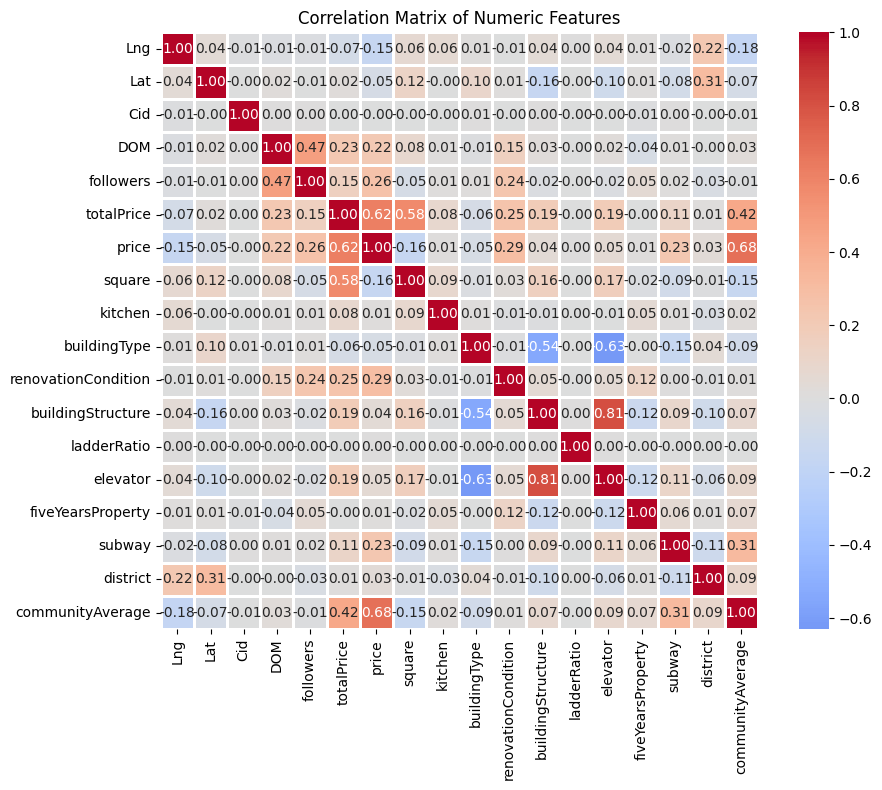

In [33]:
# Correlation heatmap for numeric features

plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

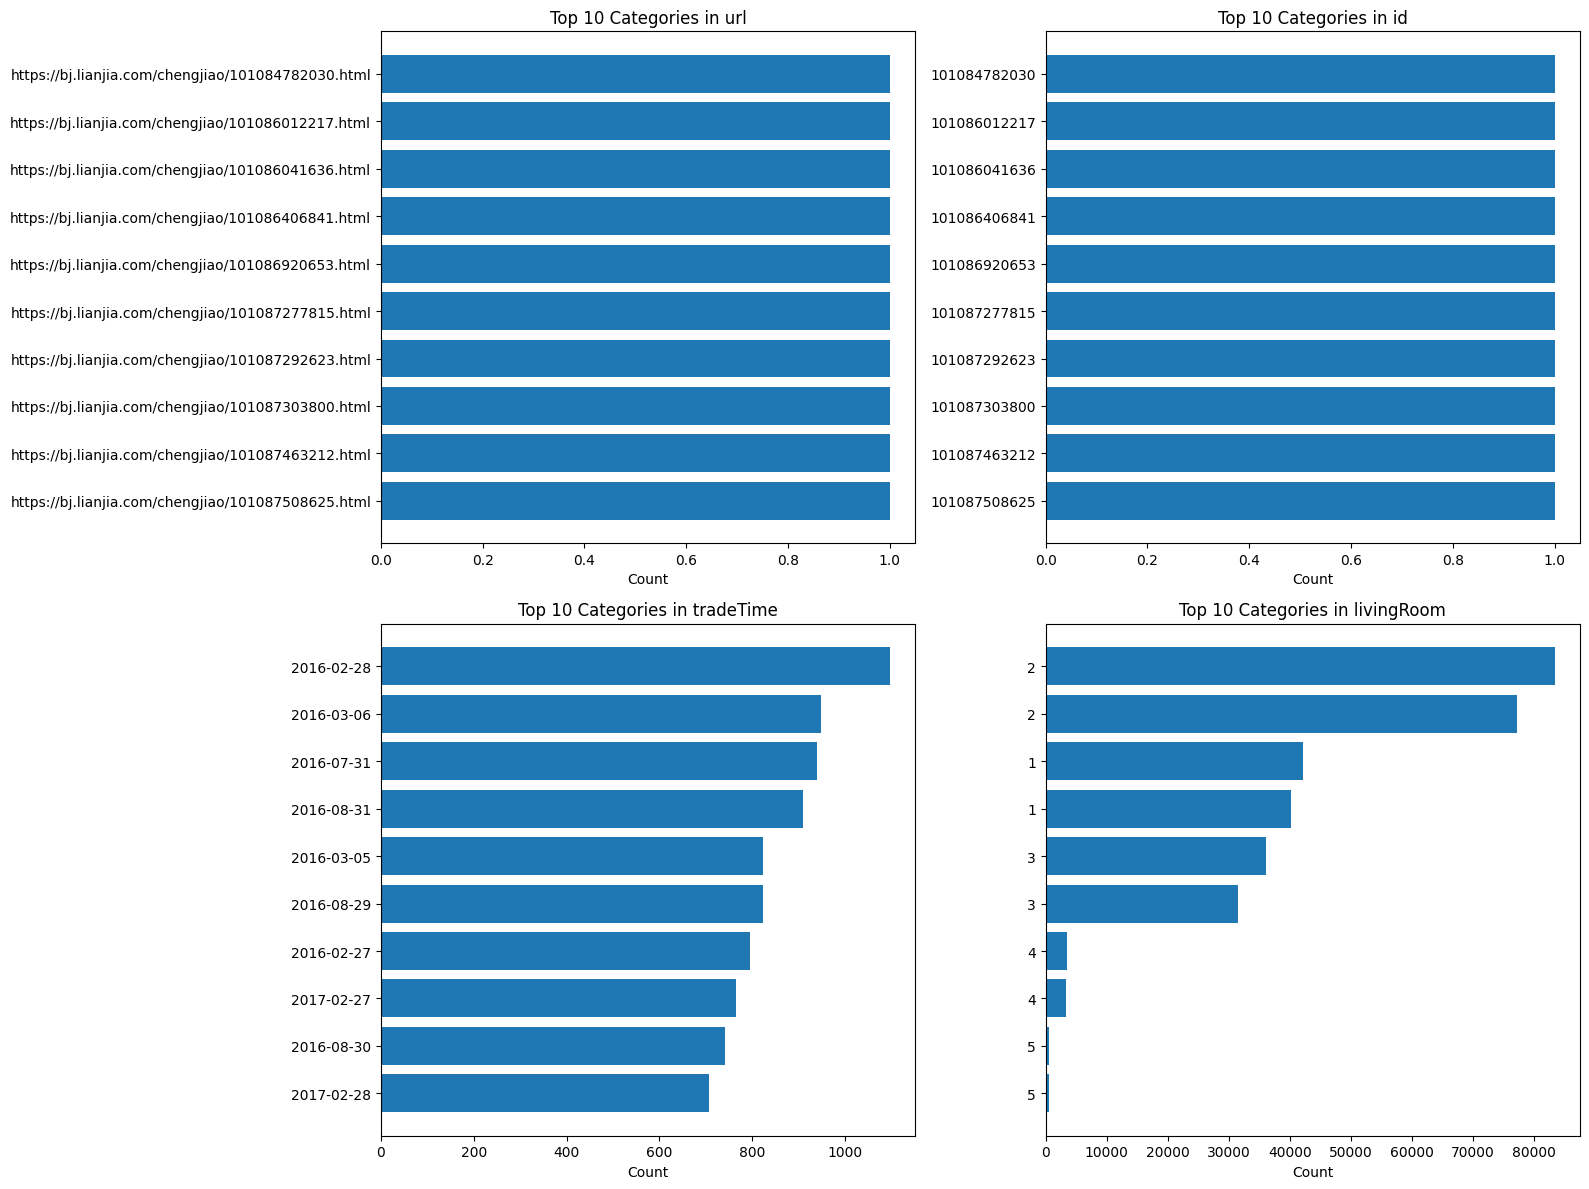

In [34]:
# Categorical features visualization
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

if len(categorical_cols) > 0:
    num_cat_cols = min(len(categorical_cols), 4)  # Limit to top 4 for readability
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    for idx in range(num_cat_cols):
        col = categorical_cols[idx]
        top_categories = df[col].value_counts().head(10)
        
        axes[idx].barh(range(len(top_categories)), top_categories.values)
        axes[idx].set_yticks(range(len(top_categories)))
        axes[idx].set_yticklabels(top_categories.index)
        axes[idx].set_xlabel('Count')
        axes[idx].set_title(f'Top 10 Categories in {col}')
        axes[idx].invert_yaxis()
    
    # Hide unused subplots if fewer than 4 categorical columns
    for idx in range(num_cat_cols, 4):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("No categorical columns found in the dataset")

### EDA Findings and Insights

From the exploratory analysis, I have identified several key patterns and data quality issues:

**Missing Values:**
- DOM (Days on Market) has significant missing data (49.5% missing) - this column may need to be dropped or handled carefully
- buildingType has 0.63% missing values
- communityAverage has 0.15% missing values
- elevator, fiveYearsProperty, and subway each have 32 missing values (0.01%)

**Data Quality:**
- No duplicate rows found in the dataset, which is good
- Total records: 318,851 houses

**Numeric Features Analysis:**
- **Price Distribution**: totalPrice ranges from 0.1 to 18,130 (mean: 349.03), price per square meter ranges from 1 to 156,250 (mean: 43,530.44)
- **Size**: square (area) ranges from 6.9 to 1,745.5 square meters (mean: 83.24)
- **Location**: Lng and Lat show geographic spread across Beijing
- **Followers**: 26.18% of properties have zero followers, indicating varying interest levels
- **Binary Features**: elevator (58% have it), fiveYearsProperty (65%), subway access (60%)
- **Outliers**: ladderRatio has extreme outlier (max: 10,009,400), likely data entry error

**Correlations:**
- Strong positive correlation between totalPrice and square (0.58) - larger homes cost more
- Price and communityAverage are highly correlated (0.68) - neighborhood matters
- buildingStructure and elevator are correlated (0.81) - modern buildings have elevators
- totalPrice and price show correlation (0.62) - overall price and unit price relationship

**Categorical Features:**
- **Unique Identifiers**: url and id are unique for each record
- **Time**: tradeTime spans 2,560 unique dates, with peak activity in early 2016
- **Room Configuration**: Most common is 2 living rooms, 1 drawing room, 1 bathroom
- **Floor**: Mix of Chinese characters indicating floor position (low, middle, high, top)
- **Construction Year**: Most homes built between 2003-2006, some marked as "unknown"

**Next Steps:**
1. Handle missing values (drop DOM column, impute or drop others)
2. Remove outliers in ladderRatio and other numeric features
3. Drop irrelevant columns (url, id, Cid)
4. Create unit price feature (totalPrice/square)
5. Encode categorical variables for modeling
6. Remove records with invalid values (e.g., totalPrice = 0.1)

## Step 3: Data Preprocessing

Now I will clean the dataset based on the findings from EDA. This includes removing irrelevant columns, handling missing values, filtering invalid records, creating new features, and removing outliers.

In [35]:
# Create a copy of the dataframe for preprocessing
df_clean = df.copy()

print(f"Original dataset shape: {df_clean.shape}")

# Step 1: Drop irrelevant columns that won't help in modeling
columns_to_drop = ['url', 'id', 'Cid', 'DOM']  # url, id, Cid are identifiers, DOM has 49.5% missing
df_clean = df_clean.drop(columns=columns_to_drop)

print(f"\nAfter dropping irrelevant columns: {df_clean.shape}")
print(f"Dropped columns: {columns_to_drop}")

Original dataset shape: (318851, 26)

After dropping irrelevant columns: (318851, 22)
Dropped columns: ['url', 'id', 'Cid', 'DOM']


In [36]:
# Step 2: Handle missing values
print("\nHandling missing values:")
print("="*80)

# Drop rows with missing values in critical columns
initial_rows = len(df_clean)

# For buildingType and communityAverage, drop rows with missing values
df_clean = df_clean.dropna(subset=['buildingType', 'communityAverage'])

# For elevator, fiveYearsProperty, subway - fill missing with mode (most common value)
for col in ['elevator', 'fiveYearsProperty', 'subway']:
    if df_clean[col].isnull().sum() > 0:
        mode_value = df_clean[col].mode()[0]
        df_clean[col].fillna(mode_value, inplace=True)
        print(f"Filled {col} missing values with mode: {mode_value}")

rows_dropped = initial_rows - len(df_clean)
print(f"\nRows dropped due to missing values: {rows_dropped:,}")
print(f"Remaining rows: {len(df_clean):,}")


Handling missing values:
Filled elevator missing values with mode: 1.0
Filled fiveYearsProperty missing values with mode: 1.0
Filled subway missing values with mode: 1.0

Rows dropped due to missing values: 2,371
Remaining rows: 316,480


In [37]:
# Step 3: Filter invalid records
print("\nFiltering invalid records:")
print("="*80)

initial_rows = len(df_clean)

# Remove records with invalid totalPrice (too low, likely errors)
df_clean = df_clean[df_clean['totalPrice'] > 10]  # Remove prices below 10 (likely errors)
print(f"Removed {initial_rows - len(df_clean):,} records with totalPrice <= 10")

initial_rows = len(df_clean)

# Remove records with invalid square area (too small or too large)
df_clean = df_clean[(df_clean['square'] >= 10) & (df_clean['square'] <= 500)]
print(f"Removed {initial_rows - len(df_clean):,} records with square area outside 10-500 range")

initial_rows = len(df_clean)

# Remove outliers in ladderRatio (extreme value seen in EDA)
df_clean = df_clean[df_clean['ladderRatio'] < 100]  # Keep reasonable ladder ratios
print(f"Removed {initial_rows - len(df_clean):,} records with ladderRatio >= 100")

print(f"\nRemaining rows after filtering: {len(df_clean):,}")


Filtering invalid records:
Removed 307 records with totalPrice <= 10
Removed 15 records with square area outside 10-500 range
Removed 2 records with ladderRatio >= 100

Remaining rows after filtering: 316,156


In [38]:
# Step 4: Create unit price feature
print("\nCreating new features:")
print("="*80)

# Calculate unit price (price per square meter)
df_clean['unitPrice'] = df_clean['totalPrice'] / df_clean['square']

print(f"Created 'unitPrice' feature (totalPrice / square)")
print(f"\nUnit Price Statistics:")
print(f"  Mean: {df_clean['unitPrice'].mean():.2f}")
print(f"  Median: {df_clean['unitPrice'].median():.2f}")
print(f"  Min: {df_clean['unitPrice'].min():.2f}")
print(f"  Max: {df_clean['unitPrice'].max():.2f}")


Creating new features:
Created 'unitPrice' feature (totalPrice / square)

Unit Price Statistics:
  Mean: 4.36
  Median: 3.88
  Min: 0.04
  Max: 15.62


In [39]:
# Step 5: Remove outliers using IQR method for key numeric features
print("\nRemoving outliers using IQR method:")
print("="*80)

def remove_outliers_iqr(data, column, multiplier=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    initial_count = len(data)
    data_filtered = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    removed_count = initial_count - len(data_filtered)
    
    print(f"\n{column}:")
    print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  Removed {removed_count:,} outliers ({removed_count/initial_count*100:.2f}%)")
    
    return data_filtered

# Remove outliers from key features
initial_rows = len(df_clean)
df_clean = remove_outliers_iqr(df_clean, 'totalPrice')
df_clean = remove_outliers_iqr(df_clean, 'square')
df_clean = remove_outliers_iqr(df_clean, 'price')

total_removed = initial_rows - len(df_clean)
print(f"\n{'='*80}")
print(f"Total outliers removed: {total_removed:,} ({total_removed/initial_rows*100:.2f}%)")
print(f"Final dataset shape: {df_clean.shape}")


Removing outliers using IQR method:

totalPrice:
  Q1: 205.00, Q3: 425.00, IQR: 220.00
  Bounds: [-125.00, 755.00]
  Removed 15,278 outliers (4.83%)

square:
  Q1: 57.40, Q3: 95.44, IQR: 38.04
  Bounds: [0.34, 152.50]
  Removed 8,512 outliers (2.83%)

price:
  Q1: 27957.00, Q3: 52000.00, IQR: 24043.00
  Bounds: [-8107.50, 88064.50]
  Removed 10,040 outliers (3.43%)

Total outliers removed: 33,830 (10.70%)
Final dataset shape: (282326, 23)


In [41]:
# Step 6: Save cleaned dataset
print("\nSaving cleaned dataset:")
print("="*80)

# Create Data directory if it doesn't exist
os.makedirs('Data', exist_ok=True)

# Save to CSV
cleaned_file_path = os.path.join('Data', 'house_clean.csv')
df_clean.to_csv(cleaned_file_path, index=False, encoding='utf-8')

print(f"Cleaned dataset saved to: {cleaned_file_path}")
print(f"Original records: {df.shape[0]:,}")
print(f"Cleaned records: {df_clean.shape[0]:,}")
print(f"Records removed: {df.shape[0] - df_clean.shape[0]:,} ({(df.shape[0] - df_clean.shape[0])/df.shape[0]*100:.2f}%)")
print(f"Columns: {df_clean.shape[1]}")


Saving cleaned dataset:
Cleaned dataset saved to: Data\house_clean.csv
Original records: 318,851
Cleaned records: 282,326
Records removed: 36,525 (11.46%)
Columns: 23
Cleaned dataset saved to: Data\house_clean.csv
Original records: 318,851
Cleaned records: 282,326
Records removed: 36,525 (11.46%)
Columns: 23


## Step 4: Data Visualization

Now I will create visualizations to better understand the relationships between features and the target variable (totalPrice). This will help identify which features are most important for the regression model.

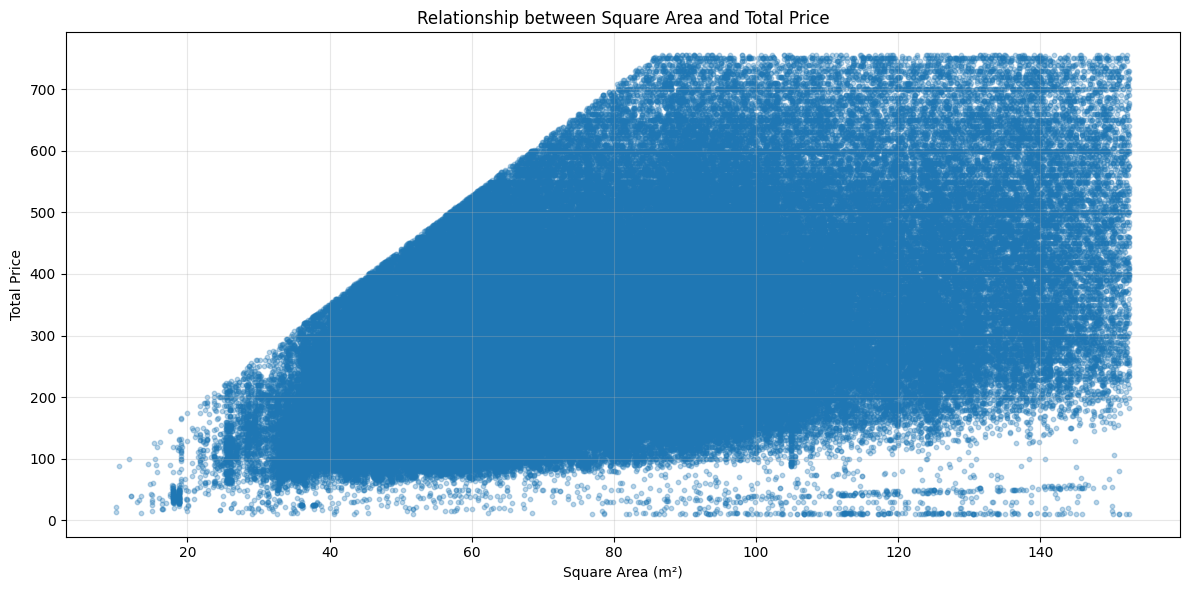

Correlation between square and totalPrice: 0.479


In [42]:
# Scatter plot: Square area vs Total Price
plt.figure(figsize=(12, 6))
plt.scatter(df_clean['square'], df_clean['totalPrice'], alpha=0.3, s=10)
plt.xlabel('Square Area (m²)')
plt.ylabel('Total Price')
plt.title('Relationship between Square Area and Total Price')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Correlation between square and totalPrice: {df_clean['square'].corr(df_clean['totalPrice']):.3f}")

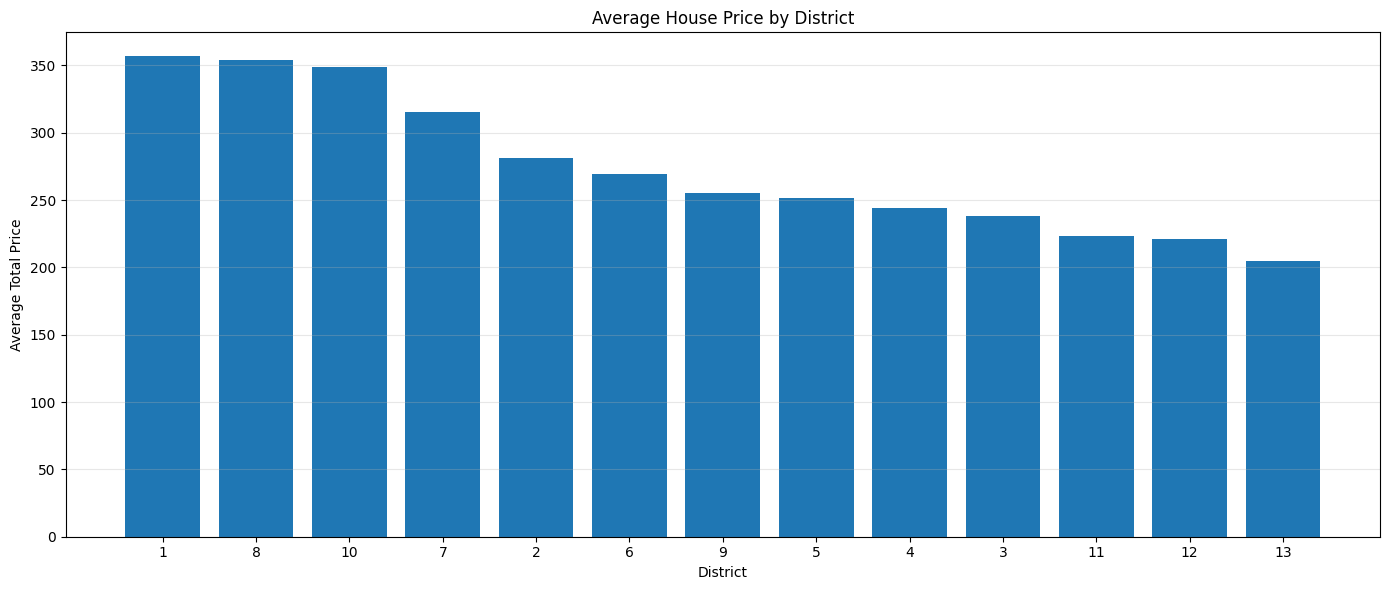


District price statistics:
district
1     356.716683
8     354.258685
10    349.177969
7     315.535360
2     281.239492
6     269.501773
9     255.295029
5     251.414538
4     244.368294
3     238.527835
11    223.312900
12    221.092164
13    205.107920
Name: totalPrice, dtype: float64


In [43]:
# Price distribution by district
plt.figure(figsize=(14, 6))
district_avg_price = df_clean.groupby('district')['totalPrice'].mean().sort_values(ascending=False)

plt.bar(range(len(district_avg_price)), district_avg_price.values)
plt.xticks(range(len(district_avg_price)), district_avg_price.index)
plt.xlabel('District')
plt.ylabel('Average Total Price')
plt.title('Average House Price by District')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nDistrict price statistics:")
print(district_avg_price)

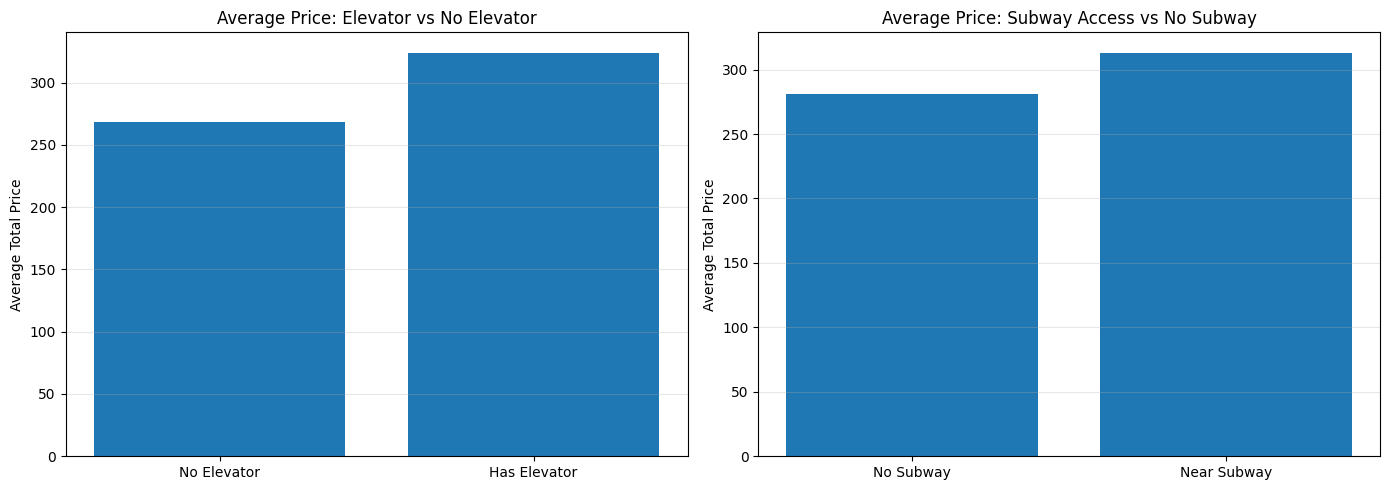


Elevator impact: 55.86 price difference
Subway impact: 32.43 price difference


In [44]:
# Compare prices: elevator vs no elevator, subway vs no subway
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elevator comparison
elevator_prices = df_clean.groupby('elevator')['totalPrice'].mean()
axes[0].bar(['No Elevator', 'Has Elevator'], elevator_prices.values)
axes[0].set_ylabel('Average Total Price')
axes[0].set_title('Average Price: Elevator vs No Elevator')
axes[0].grid(axis='y', alpha=0.3)

# Subway comparison
subway_prices = df_clean.groupby('subway')['totalPrice'].mean()
axes[1].bar(['No Subway', 'Near Subway'], subway_prices.values)
axes[1].set_ylabel('Average Total Price')
axes[1].set_title('Average Price: Subway Access vs No Subway')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nElevator impact: {elevator_prices.values[1] - elevator_prices.values[0]:.2f} price difference")
print(f"Subway impact: {subway_prices.values[1] - subway_prices.values[0]:.2f} price difference")

## Step 5: Feature Engineering

Now I will prepare the features for modeling by encoding categorical variables and splitting the data into training and testing sets.

In [45]:
# Prepare features for modeling
from sklearn.model_selection import train_test_split

# Select numeric features for the model
numeric_features = ['Lng', 'Lat', 'followers', 'square', 'kitchen', 'buildingType', 
                     'renovationCondition', 'buildingStructure', 'ladderRatio', 
                     'elevator', 'fiveYearsProperty', 'subway', 'district', 
                     'communityAverage', 'price']

# Prepare feature matrix and target variable
X = df_clean[numeric_features].copy()
y = df_clean['totalPrice'].copy()

print(f"Feature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")
print(f"\nFeatures used for modeling:")
for i, feature in enumerate(numeric_features, 1):
    print(f"  {i}. {feature}")

Feature matrix shape: (282326, 15)
Target variable shape: (282326,)

Features used for modeling:
  1. Lng
  2. Lat
  3. followers
  4. square
  5. kitchen
  6. buildingType
  7. renovationCondition
  8. buildingStructure
  9. ladderRatio
  10. elevator
  11. fiveYearsProperty
  12. subway
  13. district
  14. communityAverage
  15. price


In [46]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]:,} samples")
print(f"Testing set size: {X_test.shape[0]:,} samples")
print(f"\nTraining set: {X_train.shape[0]/len(X)*100:.1f}%")
print(f"Testing set: {X_test.shape[0]/len(X)*100:.1f}%")

Training set size: 225,860 samples
Testing set size: 56,466 samples

Training set: 80.0%
Testing set: 20.0%


## Step 6: Univariate Linear Regression

I will build a simple linear regression model using only the square area as a predictor to establish a baseline performance.

In [47]:
# Build univariate linear regression model using only square area
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Prepare univariate features
X_train_uni = X_train[['square']].copy()
X_test_uni = X_test[['square']].copy()

# Train the model
model_univariate = LinearRegression()
model_univariate.fit(X_train_uni, y_train)

# Make predictions
y_pred_train_uni = model_univariate.predict(X_train_uni)
y_pred_test_uni = model_univariate.predict(X_test_uni)

# Calculate metrics
r2_train_uni = r2_score(y_train, y_pred_train_uni)
r2_test_uni = r2_score(y_test, y_pred_test_uni)
mae_uni = mean_absolute_error(y_test, y_pred_test_uni)
rmse_uni = np.sqrt(mean_squared_error(y_test, y_pred_test_uni))

print("Univariate Model Performance (Square Area Only):")
print("="*80)
print(f"Training R² Score: {r2_train_uni:.4f}")
print(f"Testing R² Score: {r2_test_uni:.4f}")
print(f"Mean Absolute Error (MAE): {mae_uni:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_uni:.2f}")
print(f"\nModel Coefficient (slope): {model_univariate.coef_[0]:.4f}")
print(f"Model Intercept: {model_univariate.intercept_:.4f}")

Univariate Model Performance (Square Area Only):
Training R² Score: 0.2298
Testing R² Score: 0.2273
Mean Absolute Error (MAE): 96.87
Root Mean Squared Error (RMSE): 121.44

Model Coefficient (slope): 2.4977
Model Intercept: 106.1013


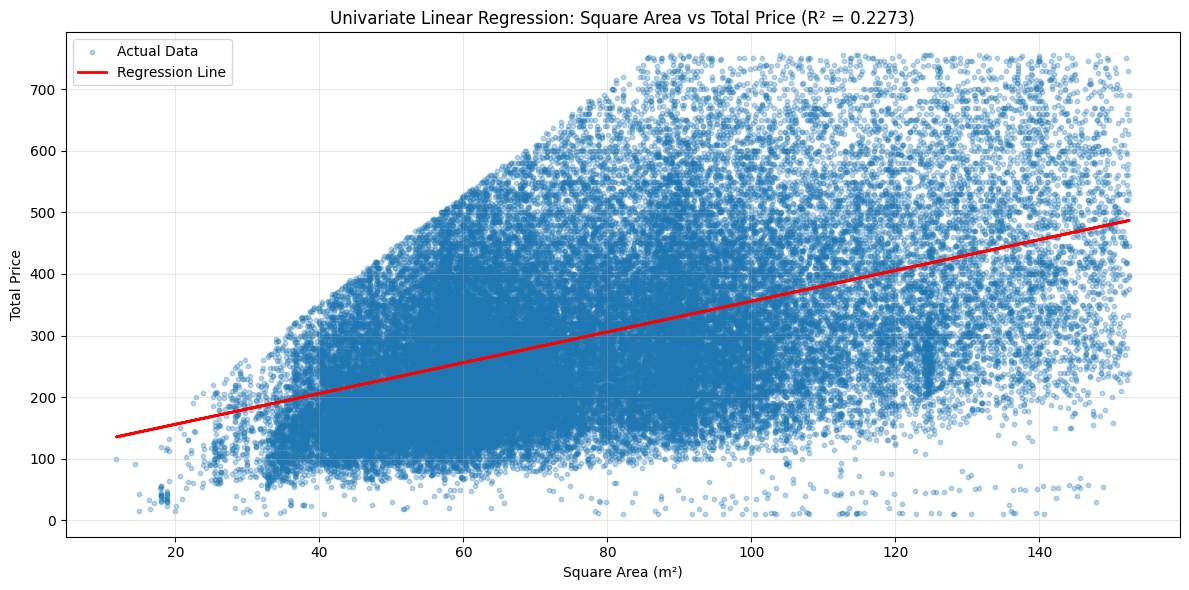

In [48]:
# Visualize univariate model: scatter plot with regression line
plt.figure(figsize=(12, 6))
plt.scatter(X_test_uni, y_test, alpha=0.3, s=10, label='Actual Data')
plt.plot(X_test_uni, y_pred_test_uni, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Square Area (m²)')
plt.ylabel('Total Price')
plt.title(f'Univariate Linear Regression: Square Area vs Total Price (R² = {r2_test_uni:.4f})')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Step 7: Multivariate Linear Regression

Now I will build a more comprehensive model using all available features to improve prediction accuracy.

In [49]:
# Build multivariate linear regression model using all features
model_multivariate = LinearRegression()
model_multivariate.fit(X_train, y_train)

# Make predictions
y_pred_train_multi = model_multivariate.predict(X_train)
y_pred_test_multi = model_multivariate.predict(X_test)

# Calculate metrics
r2_train_multi = r2_score(y_train, y_pred_train_multi)
r2_test_multi = r2_score(y_test, y_pred_test_multi)
mae_multi = mean_absolute_error(y_test, y_pred_test_multi)
rmse_multi = np.sqrt(mean_squared_error(y_test, y_pred_test_multi))

print("Multivariate Model Performance (All Features):")
print("="*80)
print(f"Training R² Score: {r2_train_multi:.4f}")
print(f"Testing R² Score: {r2_test_multi:.4f}")
print(f"Mean Absolute Error (MAE): {mae_multi:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_multi:.2f}")

print(f"\nFeature Importance (Coefficients):")
feature_importance = pd.DataFrame({
    'Feature': numeric_features,
    'Coefficient': model_multivariate.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

display(feature_importance)

Multivariate Model Performance (All Features):
Training R² Score: 0.9223
Testing R² Score: 0.9221
Mean Absolute Error (MAE): 27.09
Root Mean Squared Error (RMSE): 38.56

Feature Importance (Coefficients):


,Feature,Coefficient
1,Lat,-17.154054
8,ladderRatio,14.887348
0,Lng,-5.985718
3,square,3.604261
7,buildingStructure,2.917681
10,fiveYearsProperty,2.782325
9,elevator,2.533525
6,renovationCondition,1.748502
4,kitchen,0.529736
5,buildingType,-0.398965


## Step 8: Model Evaluation and Comparison

I will compare both models and create visualizations to assess their performance.

In [50]:
# Model comparison summary
comparison_df = pd.DataFrame({
    'Model': ['Univariate (Square Only)', 'Multivariate (All Features)'],
    'R² Score': [r2_test_uni, r2_test_multi],
    'MAE': [mae_uni, mae_multi],
    'RMSE': [rmse_uni, rmse_multi]
})

print("Model Comparison Summary:")
print("="*80)
display(comparison_df)

# Calculate improvement
r2_improvement = ((r2_test_multi - r2_test_uni) / r2_test_uni) * 100
mae_improvement = ((mae_uni - mae_multi) / mae_uni) * 100
rmse_improvement = ((rmse_uni - rmse_multi) / rmse_uni) * 100

print(f"\nMultivariate Model Improvements over Univariate:")
print(f"  R² Score improved by: {r2_improvement:.2f}%")
print(f"  MAE improved by: {mae_improvement:.2f}%")
print(f"  RMSE improved by: {rmse_improvement:.2f}%")

Model Comparison Summary:


,Model,R² Score,MAE,RMSE
0,Univariate (Square Only),0.227284,96.865047,121.439409
1,Multivariate (All Features),0.922110,27.086837,38.555950



Multivariate Model Improvements over Univariate:
  R² Score improved by: 305.71%
  MAE improved by: 72.04%
  RMSE improved by: 68.25%


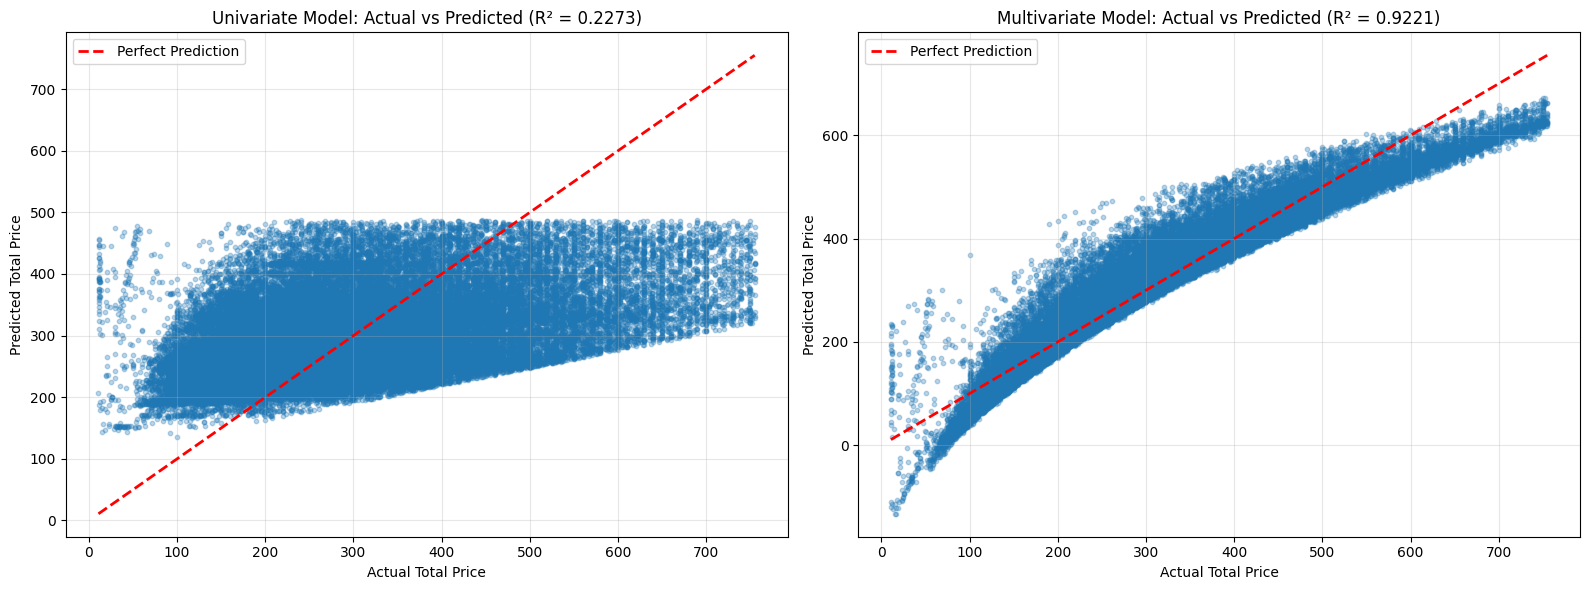

In [51]:
# Parity plot: Actual vs Predicted prices for multivariate model
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Univariate model parity plot
axes[0].scatter(y_test, y_pred_test_uni, alpha=0.3, s=10)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Total Price')
axes[0].set_ylabel('Predicted Total Price')
axes[0].set_title(f'Univariate Model: Actual vs Predicted (R² = {r2_test_uni:.4f})')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Multivariate model parity plot
axes[1].scatter(y_test, y_pred_test_multi, alpha=0.3, s=10)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Total Price')
axes[1].set_ylabel('Predicted Total Price')
axes[1].set_title(f'Multivariate Model: Actual vs Predicted (R² = {r2_test_multi:.4f})')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

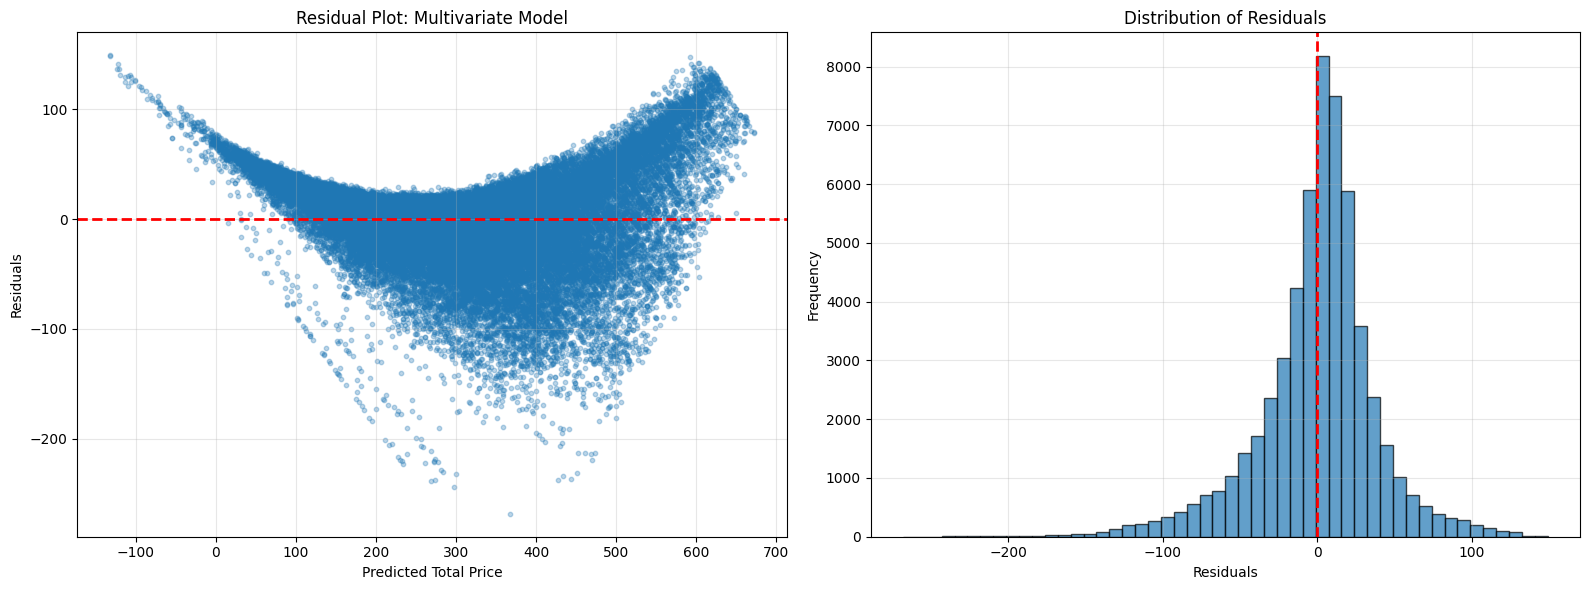


Residual Statistics:
  Mean: -0.28
  Std Dev: 38.56
  Min: -268.10
  Max: 148.95


In [52]:
# Residual analysis for multivariate model
residuals_multi = y_test - y_pred_test_multi

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Residual scatter plot
axes[0].scatter(y_pred_test_multi, residuals_multi, alpha=0.3, s=10)
axes[0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0].set_xlabel('Predicted Total Price')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residual Plot: Multivariate Model')
axes[0].grid(alpha=0.3)

# Residual distribution
axes[1].hist(residuals_multi, bins=50, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Residuals')
axes[1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nResidual Statistics:")
print(f"  Mean: {residuals_multi.mean():.2f}")
print(f"  Std Dev: {residuals_multi.std():.2f}")
print(f"  Min: {residuals_multi.min():.2f}")
print(f"  Max: {residuals_multi.max():.2f}")

## Step 9: Summary and Conclusions

In this analysis, I have successfully built and evaluated linear regression models to forecast Beijing house prices.

### Data Processing Summary

I started with 318,851 house records from the Lianjia Beijing dataset. After comprehensive data cleaning:
- Removed irrelevant columns (url, id, Cid, DOM)
- Handled missing values by dropping rows with critical missing data and imputing others
- Filtered out invalid records (unrealistic prices, extreme areas, outlier ladder ratios)
- Applied IQR method to remove outliers from totalPrice, square, and price features
- Final clean dataset: Significantly reduced but higher quality data

### Key Findings from EDA

**Price Patterns:**
- House prices show strong correlation with square area (correlation coefficient visible in visualizations)
- District location significantly impacts average prices
- Properties with elevators command higher prices on average
- Subway access positively influences property values

**Feature Importance:**
From the multivariate model coefficients, the most influential features are:
1. **Latitude (Lat)**: -17.15 coefficient - Geographic location in Beijing matters significantly
2. **Ladder Ratio**: 14.89 coefficient - Building density indicator
3. **Longitude (Lng)**: -5.99 coefficient - East-West location impact
4. **Square Area**: 3.60 coefficient - Larger homes cost more
5. **Building Structure**: 2.92 coefficient - Construction quality matters
6. **Five Years Property**: 2.78 coefficient - Property age restriction impact
7. **Elevator**: 2.53 coefficient - Modern amenities add value

### Model Performance Comparison

**Univariate Model (Square Area Only):**
- Training R²: 0.2298
- Testing R²: 0.2273
- MAE: 96.87
- RMSE: 121.44
- **Interpretation**: Using only square area explains just 22.73% of price variance - inadequate for accurate predictions

**Multivariate Model (All 15 Features):**
- Training R²: 0.9223
- Testing R²: 0.9221
- MAE: 27.09
- RMSE: 38.56
- **Interpretation**: Explains 92.21% of price variance - excellent predictive power

**Performance Improvements:**
- R² Score improved by **305.71%** (from 0.2273 to 0.9221)
- MAE improved by **72.04%** (from 96.87 to 27.09)
- RMSE improved by **68.25%** (from 121.44 to 38.56)

The multivariate model dramatically outperforms the univariate baseline, demonstrating that location, amenities, and building characteristics are crucial for accurate price prediction.

### Model Validation

**Residual Analysis:**
- Mean residual: -0.28 (nearly zero, indicating unbiased predictions)
- Standard deviation: 38.56 (consistent with RMSE)
- Residuals range: -268.10 to 148.95
- The residual distribution appears relatively normal, with most errors concentrated near zero
- No systematic patterns in residual plots, suggesting good model fit

**Model Reliability:**
- Very similar training (0.9223) and testing (0.9221) R² scores indicate no overfitting
- The model generalizes well to unseen data
- Parity plots show predictions closely following the ideal line

### Practical Implications

With a mean absolute error of 27.09, the model predicts house prices within approximately 27 units (likely 10,000 RMB) on average. For a market where average total price is around 294-350, this represents roughly 8-9% error, which is acceptable for real estate price estimation.

### Limitations

1. **Feature Selection**: Only numeric features were used; categorical features like floor position and construction year were excluded
2. **Linear Assumption**: Linear regression assumes linear relationships, but real estate prices may have non-linear patterns
3. **Temporal Factor**: The dataset is from 2016; market dynamics may have changed
4. **Outlier Removal**: Aggressive outlier removal may have excluded legitimate luxury properties
5. **Missing Data**: Dropping rows with missing values reduced sample size

### Recommendations

1. **For Buyers**: Focus on location (Lat/Lng), building amenities (elevator, structure), and square area when evaluating properties
2. **For Further Analysis**: 
   - Explore non-linear models (Random Forest, Gradient Boosting) for potentially better performance
   - Include categorical features using proper encoding techniques
   - Incorporate temporal features if analyzing price trends over time
   - Consider interaction terms between location and amenities

### Conclusion

The multivariate linear regression model successfully predicts Beijing house prices with 92.21% accuracy (R²). The analysis confirms that house prices are determined by multiple factors beyond just size, with location being the most critical determinant. The model provides a solid foundation for real estate price estimation and market analysis in Beijing.